In [4]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [5]:
from rdkit import RDLogger
from utils import generator_from_conf, conf_from_yaml
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

seed: 1751341448
Starting generation...
<best reward updated> order: 1, time: 0.00, reward: 0.2421, node: COCCCN1CCO[C@H](c2ccc(O)cc2)C1
<best reward updated> order: 4, time: 0.20, reward: 0.6323, node: O=C1N(CCCCc2ccccc2)CCN1C1CC1
<best reward updated> order: 5, time: 0.21, reward: 0.6956, node: c1ccc2sc(-c3ccncc3)nc2c1
<best reward updated> order: 15, time: 0.30, reward: 0.7714, node: OCc1c(Br)cnn1CCn1cc(Br)cn1
<best reward updated> order: 27, time: 0.45, reward: 0.7920, node: C=CCNC(=O)C[C@H](C)COC(=O)c1cc2c(s1)CCC2
<best reward updated> order: 38, time: 0.57, reward: 0.7957, node: CS[C@H]1CC[C@@H](NC(=O)N[C@H](C)CCc2cccs2)C1
<best reward updated> order: 60, time: 0.81, reward: 0.9507, node: CSC(C)(C)CNC(=O)N[C@@H](C)[C@@H](C)CO
generated: 100, time: 1.21, average over 100: 0.0893
<best reward updated> order: 131, time: 1.51, reward: 0.9508, node: C=CO/N=C/C=C/C=C\C
<best reward updated> order: 185, time: 2.07, reward: 0.9509, node: C=CO/N=C(/[S-])C(CC)CC
generated: 200, time: 2.19,

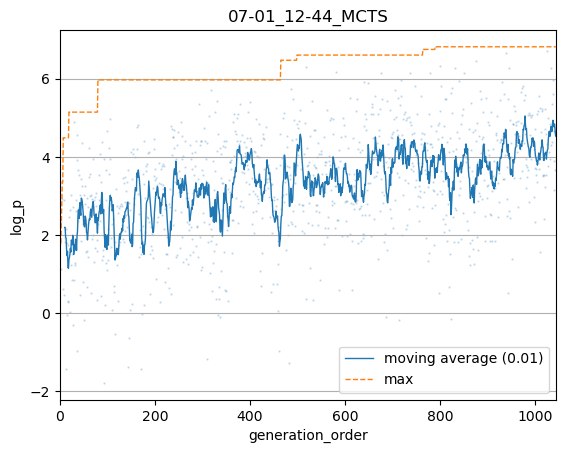

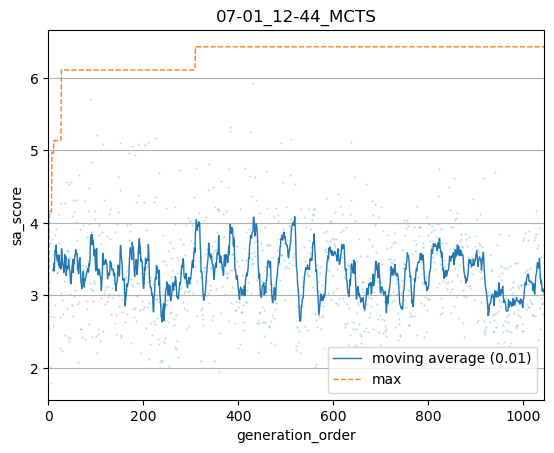

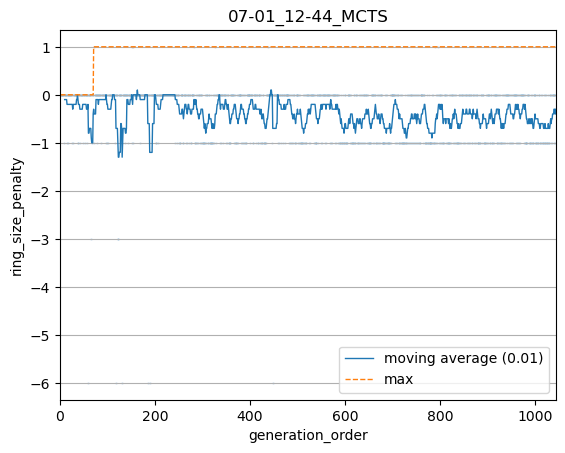

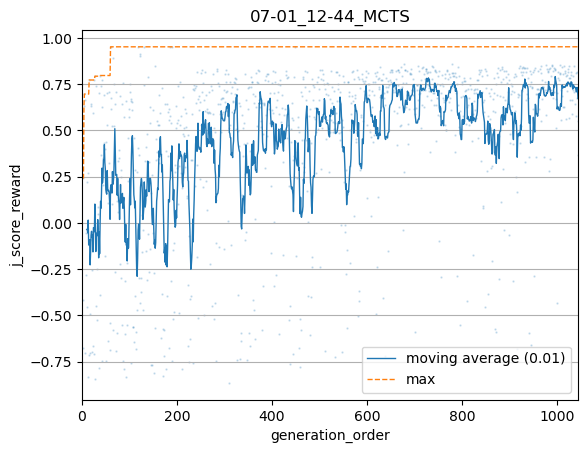

number of generated nodes: 1044
valid rate: 0.9574638844301766
unique rate: 0.8804173354735152
node_per_sec: 104.39009187327034
best_reward: 0.9508662040575889
average_reward: 0.4452520471767714


In [3]:
# start generation
c1 = "config/mcts_helm.yaml"
c2 = "config/mcts_smiles.yaml"
c3 = "config/model_test.yaml"
c4 = "config/mcts_d_score.yaml"

conf = conf_from_yaml(c2, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

In [ ]:
#continue search
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
load_dir = "generation_result/06-26_08-51/"
generator, conf = read_yaml("sandbox/" + load_dir + "setting.yaml")
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
read_yaml(c2)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)